Emna Barred & Nabil Lamrabet

In [112]:
import numpy as np
np.set_printoptions(threshold=10000, suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [113]:
villes = pd.read_csv('./villes.csv', sep=';')
villes.head(5)

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


In [114]:
villes.shape

(32, 13)

In [184]:
x = villes.iloc[:,1:13].values
labels = villes.iloc[:,0].values

# ACP

In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [187]:
#on fait du "feature scaling" pour reduire les valeurs de tout les features du dataset à l'intervalle (-1, 1) 
SC = StandardScaler()
SC.fit(x)
xnorm=SC.transform(x)

In [181]:
#on garde tout les axes
pca = PCA(n_components=12)
pca.fit(xnorm)

PCA(n_components=12)

In [119]:
#on récupere les valeurs propres de chaque axe 
pca.explained_variance_

array([10.80999558,  1.45184229,  0.0581652 ,  0.03279996,  0.01406283,
        0.00621041,  0.00523837,  0.00406512,  0.00187861,  0.00145726,
        0.0010361 ,  0.00034505])

In [120]:
#explained_variance_ratio_ nous aide a recuprer la variance cumulée. 
#On remarque que les deux premiers axes nous apporte plus que 90% de l'information 
# 0.87268193 + 0.11720602 = 0.98988795 soit presque 99%
pca.explained_variance_ratio_

array([0.87268193, 0.11720602, 0.00469563, 0.00264791, 0.00113528,
       0.00050136, 0.00042289, 0.00032817, 0.00015166, 0.00011764,
       0.00008364, 0.00002786])

D'ailleur si on demande 90% de l'information avec pca = PCA(n_components=0.9), explained_variance_ratio_ ne va retourner que les deux premiers axes

In [121]:
#les poids des axes d'origine pour la premier variable de l'ACP qui apporte 0.87268193 de l'information
#on remarque qu'il y a pas une grande difference entre les valeurs, c'est à dire que tout les variable
#participe à peu prés avec le meme poids
pca.components_[0,:]

array([0.27151028, 0.28846164, 0.3010811 , 0.30354174, 0.28353089,
       0.27841907, 0.27290295, 0.28757774, 0.30472022, 0.3038548 ,
       0.29242808, 0.2729549 ])

In [122]:
#les poids des axes d'origine pour la deuxieme variable de l'ACP qui apporte 0.11720602 de l'information

pca.components_[1,:]

array([ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
       -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
        0.26269461,  0.38693688])

In [123]:
#valeur seuil
1/np.sqrt(12)

0.2886751345948129

# interprétation du premier axe y1:

    y1= 0.27151028 * janvier + ... + 0.2729549 * décembre
    
Les valeurs des poids sont très proches de la valeur du seuil (0.2886751345948129). Ceci nous permet de dire que tous les variables participent (de janvier jusqu'à décembre).
    
De plus, vu qu'elle ont toutes des poids positifs, si on calcule y1 pour une ville et on obtient une valeur positive alors cette ville a de fortes températures toute l'année (de janvier jusqu'a décembre).
    
Par contre, si la valeur de y1 est négative alors, celle-ci a de faibles températures toute l'année.
        
Si la valeur de y1 est moyenne, cela signifie ville a des température moyennes tout l'année.

# Interprétation du second axe y2:

    y2= 0.39933494 * janvier + ... + 0.38693688 * décembre
    
Les valeurs absolues des poids qui sont proches de la valeur du seuil sont: 0.39933494, 0.29907184, -0.32314291, -0.35846763, -0.38879639, -0.3010133 ,0.38693688 . 

Ceci signife que janvier février et décembre participent avec des poids positifs alors que mai, juin, juillet et aout participent avec des poids négatifs.
        
Donc si on calcule y2 pour une ville et on obtient une valeur positive, ceci signifie que cette ville a de fortes températures en hiver (de janvier février et décembre) mais de faibles températures en fin printemps/été (mai, juin, juillet et aout).
        
Par contre, si la valeur de y2 est négative, on déduit que cette ville a de fortes températures dans les mois de mai, juin, juillet et aout, mais de faibles températures dans les mois en hiver (janvier février et décembre).

Si la valeur de y2 est moyenne c'est a dire que cette ville a des température moyennes tout l'année.

In [188]:
#X_pca est la matrices contenant tout les valeurs des axes de y1 à y12
X_pca = pca.transform(xnorm)

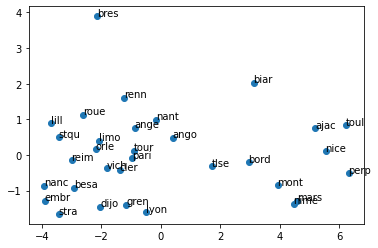

In [125]:
#on ne s'interesse qu'au deux premiers axes y1 et y2
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

x correspond à y1 qui nous permet d'interpreter sur la température  durant toute l'année. On voit que les villes du sud sont plutot à droite (positives) vu qu'il y fait beau presque toute l'année alors que les villes du nord tendent vers la gauche (négative) vu qu'il fait plutot mauvais toute l'année.

y correspond à y2 qui nous permet de voir l'écart de température entre les saisons hiver-été. On remarque que pour Brest, contrairement à Lyon, la saison hivernale est caracterisé par une température élévé tandis qu'à l'été, il fait frais.

Les villes situés au mileu (e. g. Nantes, Tours, Angouleme) ont des température moyennes durant toute l'année


## Crimes

In [126]:
crimes = pd.read_csv('./crimes.csv', sep=';')
crimes.head(5)

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [127]:
crimes.shape

(50, 8)

In [128]:
x_crimes = crimes.iloc[:,1:8].values
labels_crimes = crimes.iloc[:,0].values

In [129]:
x_crimes.shape

(50, 7)

In [130]:
labels_crimes.shape

(50,)

In [131]:
sc_crimes = StandardScaler()
sc_crimes.fit(x_crimes)
x_crimes_norm=sc_crimes.transform(x_crimes)

In [132]:
pca_crimes = PCA(n_components=7)
pca_crimes.fit(x_crimes_norm)

PCA(n_components=7)

In [133]:
pca_crimes.explained_variance_

array([4.19893828, 1.26400187, 0.74062921, 0.32288984, 0.26323924,
       0.22657089, 0.12658781])

In [134]:
pca_crimes.explained_variance_ratio_

array([0.58785136, 0.17696026, 0.10368809, 0.04520458, 0.03685349,
       0.03171992, 0.01772229])

On doit retenir les 4 premiers axes si on veut représenter au moins 90% de l'information. 
0.58785136 + 0.17696026 + 0.10368809 + 0.04520458 = 0.91370429 soit eviron 91% de l'information. Néanmoins si on utilise le critère de Kaiser on ne garde que les deux premiers axes.

In [135]:
pca_crimes.components_[0,:]

array([0.30027916, 0.43175936, 0.39687549, 0.3966517 , 0.44015721,
       0.35735953, 0.29517681])

In [136]:
pca_crimes.components_[1,:]

array([-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
        0.40231912,  0.50242093])

In [137]:
pca_crimes.components_[2,:]

array([ 0.1782453 , -0.24419758,  0.49586087, -0.06950972, -0.20989509,
       -0.53923144,  0.56838373])

In [138]:
pca_crimes.components_[3,:]

array([-0.23211411,  0.06221567, -0.55798926,  0.62980445, -0.05755491,
       -0.23488987,  0.41923832])

In [139]:
#valeur seuil
1/np.sqrt(7)

0.3779644730092272

# interprétation du premier axe y1:

    y1= 0.30027916 * Meutre + ... + 0.29517681 * Auto_Theft
    
Les valeurs des poids sont plutot proches de la valeur du seuil (0.3779644730092272). Ceci nous permet de dire que tous les varibles participent.
    
De plus, vu qu'elles ont toutes des poids positifs, elle vont nous permettre d'interpreter sur le niveau de criminalité d'un état comme suit :

    - Si on calcule y1 pour un état et on obtient une valeur positive alors cet état à beacoup de crimes de tout genre. 
    
    - Si la valeur de y1 est négative alors cet état est plutot sécurisé.
    
    - Si la valeur de y1 est moyenne c'est a dire que cet état a taux de criminalité moyen.

# interprétation du second axe y2:

    y1= -0.62917444 * Meutre + ... + 0.50242093 * Auto_Theft
    
Les valeurs absolues des poids qui sont proches de la valeur du seuil sont: -0.62917444, -0.34352815, 0.40231912,  0.50242093 . 

Ceci signife que Vol et Auto_Theft participent avec des poids positifs alors que Meutre et Attaque participent avec des poids négatifes.
        
Donc si on calcule y2 pour un état et on obtient une valeur positive, ceci signifie que les criminels de cet état ont plus tendance à voler les affaires publiques/personnels notamment les voitures. Mais ils ont moins tendance à tuer ou blesser des citoyens.
        
Par contre, si la valeur de y2 est négative, on déduit que le système criminel de cet état est assez violent, ou les crimes sont principalement des agressions, meurtres et toute violence physique en générale.

Si la valeur de y2 est moyenne c'est a dire que cet état a un taux de criminalité moyen.

In [140]:
X_pca_crimes = pca_crimes.transform(x_crimes_norm)

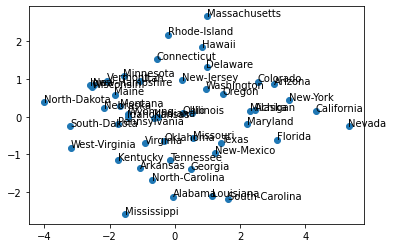

In [141]:
plt.scatter(X_pca_crimes[:, 0], X_pca_crimes[:, 1])
for label, x, y in zip(labels_crimes, X_pca_crimes[:, 0], X_pca_crimes[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

L'axe des x représente y1, on se basant sur l'explication que nous avons fait plus tot, on remarque qu'il est plus sur de vivre à North-Dakota qu'en Californie ou Nevada.

L'axe des y représente y2, on peut voir que le point commun entre les deux état Massachusetts et Mississippi et le fait qu'ils ont un taux de ciriminalité moyen, vu que les deux états résident au milieu de la représentation. Mais les types des crimes commis sont différent, à Mississippi, les criminels sont plus violents et tendance a etre des meurtiers tandis que sur Massachusetts y a plus d'atteintes à la propriété que de violence physique. 

## Startups

In [142]:
startups = pd.read_csv('./50_Startups.csv', sep=';')
startups.head(5)

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


In [143]:
startups.shape

(50, 5)

In [144]:
x_startups = startups.iloc[:,1:5].values
id_startups = startups.iloc[:,0].values

In [145]:
x_startups.shape

(50, 4)

In [146]:
id_startups.shape

(50,)

In [147]:
sc_startups = StandardScaler()
sc_startups.fit(x_startups)
x_startups_norm = sc_startups.transform(x_startups)

In [148]:
pca_startups = PCA(n_components=4)
pca_startups.fit(x_startups_norm)

PCA(n_components=4)

In [149]:
pca_startups.explained_variance_

array([2.7267099 , 1.04019163, 0.28830861, 0.02642251])

In [150]:
pca_startups.explained_variance_ratio_

array([0.66804393, 0.25484695, 0.07063561, 0.00647351])

Pour conserver au moins 90% de l'information représentée on doit prendre 2 axes.
0.66804393 + 0.25484695 = 0.92289088 soit environ 92% de l'information

In [151]:
pca_startups.components_[0,:]

array([0.59347855, 0.14737886, 0.52064694, 0.59580992])

In [152]:
pca_startups.components_[1,:]

array([-0.04048087, -0.95051314,  0.30797098,  0.00632069])

In [153]:
#valeur seuil
1/np.sqrt(4)

0.5

# interprétation du premier axe y1:

    y1= 0.59347855 * Depenses R&D + ... + 0.59580992 * Benefices
    
Les valeurs des poids dépenses R&D, dépenses marketing et bénéfices sont très proches de la valeur du seuil (0.5). 
    
Ces valeurs présentent des poids positives nous permettant d'interpreter comme suit :

    * Si on calcule y1 pour une startup et on obtient une valeur positive alors cette startup a investi dans les départements marketing et R&D et elle a généré becoup de bénéfices. 
    
    * Si la valeur de y1 est négative, alors le/les startup owner(s) n'a pas investit dans sa startup, par conséquent elle est infructueuse.
    
    * Si la valeur de y1 est moyenne c'est a dire que les depense en R&D et Marketing sont moyennes et par conséquent les gains sont moyens.

# interprétation du second axe y2:

    y1= -0.04048087 * Depenses R&D + ... + 0.00632069 * Benefices
    
la valeur absolue du poids superieure ou égale à celle du seuil est: -0.95051314. 

Ceci signife que Depenses Administration participe avec un poids négatif.
        
Si on calcule y2 pour une start et on obtient une valeur positive, ceci signifie que cette startup n'a pas beacoup de dépenses adminstratives. Par contre si elle est négative, c'est à dire qu'elle dépense beaucoup dans ce département.
Si la valeur de y2 est moyenne cette startup a des dépenses administration moyennes.

In [154]:
X_pca_startups = pca_startups.transform(x_startups_norm)

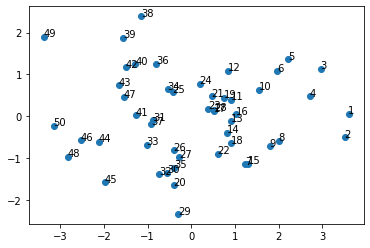

In [177]:
plt.scatter(X_pca_startups[:, 0], X_pca_startups[:, 1])
for label, x, y in zip(id_startups, X_pca_startups[:, 0], X_pca_startups[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

L'axe des x et des y représentant respectiviement y1 et y2, on remarque que la plupart des startup sont au milieu. Signifiant que les dépenses sur les trois départements R&D, Marketing et administration sont moyennes et les bénéfices générés sont moyennes. Ce qui est cohérents avec le concept des startup ayant des budget limités et commencant à petit pas.

Quelques unes ont le privilèges de dépenser plus et par conséquent générer plus de gains (exemple: 1 et 2). Par contre certaines sont vraiment sans résultat, comme 49, qui ne dépense pas assez sur tout les département et génère très peu de gains.

## Clustering

In [156]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib
from sklearn import metrics

In [157]:
clustering = KMeans(n_clusters=3).fit_predict(xnorm)

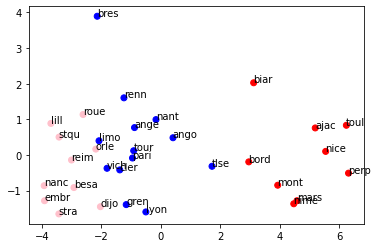

In [158]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [170]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(xnorm)

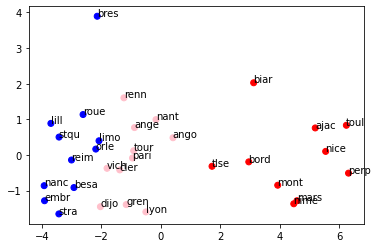

In [171]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [172]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(xnorm)

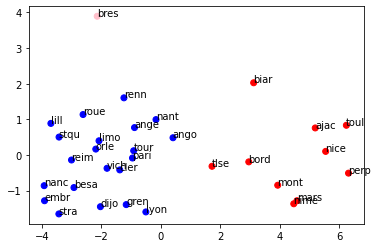

In [173]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [174]:
for i in np.arange(2, 6):
    clustering = KMeans(n_clusters=i).fit_predict(xnorm)
    print(i, metrics.silhouette_score(xnorm, clustering,metric='euclidean'))
    print()

2 0.625557719180767

3 0.3836500332030729

4 0.39249385306689233

5 0.33943752813336825



D'après le critère silhouette index, la meilleure partition est 2 pour KMeans :

In [175]:
clustering = KMeans(n_clusters=2).fit_predict(xnorm)

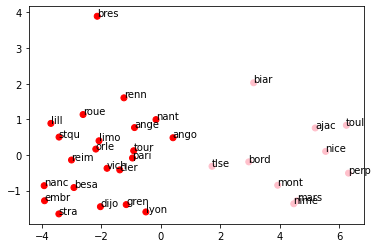

In [176]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

On peut déceler une ségmentation topologique des ville, pour chaque cluster on peut associer une zone géographique (les villes du Nord pour le premier cluster et les villes du Sud pour le second).